# **Stock seguridad**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_probabilizado")
data

,L,µ,σ,α,stock_seguridad,reorden
0,5,98,29,0.07,95.70,585.70
1,1,115,20,0.04,35.01,150.01
2,8,123,21,0.02,121.99,1105.99
3,9,171,14,0.01,97.71,1636.71
4,8,150,22,0.08,87.43,1295.43
...,...,...,...,...,...,...
95,2,140,21,0.03,55.86,335.86
96,1,93,13,0.01,30.24,123.24
97,2,126,25,0.04,61.90,313.90
98,6,135,19,0.01,108.27,918.27


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["L","µ","σ","α"]])
targets = np.asarray(data["reorden"])

In [ ]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_targets,test_targets = train_test_split(features,targets,random_state = 60,test_size=0.2)
train_features.shape,test_features.shape

((80, 4), (20, 4))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.fit_transform(test_features)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

50.514999999999986

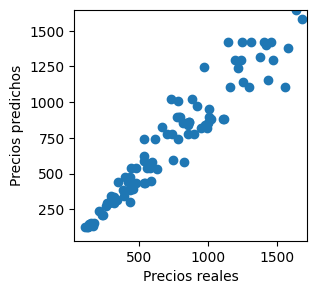

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[9.00e+00, 1.71e+02, 1.40e+01, 1.00e-02],
       [9.00e+00, 1.80e+02, 1.50e+01, 9.00e-02],
       [1.00e+00, 1.84e+02, 1.80e+01, 9.00e-02],
       [1.00e+00, 1.36e+02, 1.70e+01, 4.00e-02],
       [1.00e+00, 1.03e+02, 2.20e+01, 5.00e-02],
       [9.00e+00, 1.23e+02, 2.90e+01, 6.00e-02],
       [5.00e+00, 1.64e+02, 1.10e+01, 9.00e-02],
       [3.00e+00, 1.48e+02, 2.20e+01, 1.00e-02],
       [6.00e+00, 1.32e+02, 1.40e+01, 8.00e-02],
       [4.00e+00, 1.77e+02, 1.10e+01, 8.00e-02],
       [6.00e+00, 1.94e+02, 2.30e+01, 6.00e-02],
       [9.00e+00, 1.25e+02, 1.70e+01, 9.00e-02],
       [5.00e+00, 1.01e+02, 1.20e+01, 8.00e-02],
       [4.00e+00, 9.10e+01, 2.50e+01, 7.00e-02],
       [1.00e+00, 1.10e+02, 1.70e+01, 6.00e-02],
       [5.00e+00, 1.86e+02, 1.70e+01, 5.00e-02],
       [5.00e+00, 1.72e+02, 2.30e+01, 4.00e-02],
       [3.00e+00, 1.42e+02, 1.80e+01, 6.00e-02],
       [8.00e+00, 9.40e+01, 2.50e+01, 2.00e-02],
       [1.00e+00, 9.30e+01, 1.30e+01, 1.00e-02]])

In [ ]:
cop = d_tree.predict([[1,	108,	38	,0.041]])

In [ ]:
cop

array([150.01])

# **Punto de Reorden**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_probabilizado")
data

,L,µ,σ,α,stock_seguridad,reorden
0,5,98,29,0.07,95.70,585.70
1,1,115,20,0.04,35.01,150.01
2,8,123,21,0.02,121.99,1105.99
3,9,171,14,0.01,97.71,1636.71
4,8,150,22,0.08,87.43,1295.43
...,...,...,...,...,...,...
95,2,140,21,0.03,55.86,335.86
96,1,93,13,0.01,30.24,123.24
97,2,126,25,0.04,61.90,313.90
98,6,135,19,0.01,108.27,918.27


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["L","µ","σ","α"]])
targets = np.asarray(data["stock_seguridad"])

In [ ]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_targets,test_targets = train_test_split(features,targets,random_state = 60,test_size=0.2)
train_features.shape,test_features.shape

((80, 4), (20, 4))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.fit_transform(test_features)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

9.68

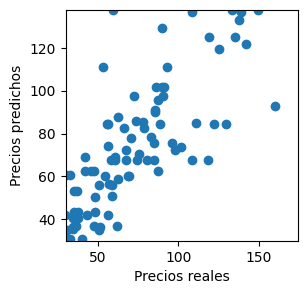

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[8.00e+00, 1.63e+02, 1.10e+01, 1.00e-02],
       [7.00e+00, 1.90e+02, 1.80e+01, 3.00e-02],
       [3.00e+00, 1.64e+02, 1.60e+01, 5.00e-02],
       [5.00e+00, 1.38e+02, 2.90e+01, 2.00e-02],
       [8.00e+00, 1.99e+02, 3.00e+01, 8.00e-02],
       [1.00e+00, 1.20e+02, 2.60e+01, 2.00e-02],
       [1.00e+00, 1.03e+02, 2.20e+01, 5.00e-02],
       [5.00e+00, 1.64e+02, 1.10e+01, 9.00e-02],
       [9.00e+00, 1.73e+02, 1.60e+01, 3.00e-02],
       [3.00e+00, 8.00e+01, 1.80e+01, 3.00e-02],
       [3.00e+00, 1.34e+02, 1.50e+01, 9.00e-02],
       [3.00e+00, 1.16e+02, 2.10e+01, 1.00e-02],
       [5.00e+00, 1.90e+02, 1.30e+01, 5.00e-02],
       [2.00e+00, 1.36e+02, 1.70e+01, 4.00e-02],
       [3.00e+00, 1.82e+02, 2.00e+01, 1.00e-02],
       [3.00e+00, 1.85e+02, 1.50e+01, 1.00e-02],
       [6.00e+00, 1.13e+02, 1.40e+01, 5.00e-02],
       [3.00e+00, 1.03e+02, 2.90e+01, 8.00e-02],
       [3.00e+00, 1.49e+02, 1.20e+01, 7.00e-02],
       [1.00e+00, 1.76e+02, 2.90e+01, 2.00e-02]])

In [ ]:
cop = d_tree.predict([[1,	108,	38	,0.041]])

In [ ]:
cop

array([84.9])